### 카카오 api 키 발급받기 및 위경도 추출
- 카카오는 국내 주소에 대해서만 작동
- 해외 주소는 google 개발자 등록이 필요함
    - 결제 계정 정보가 필요  

- https://developers.kakao.com/ 로 접속
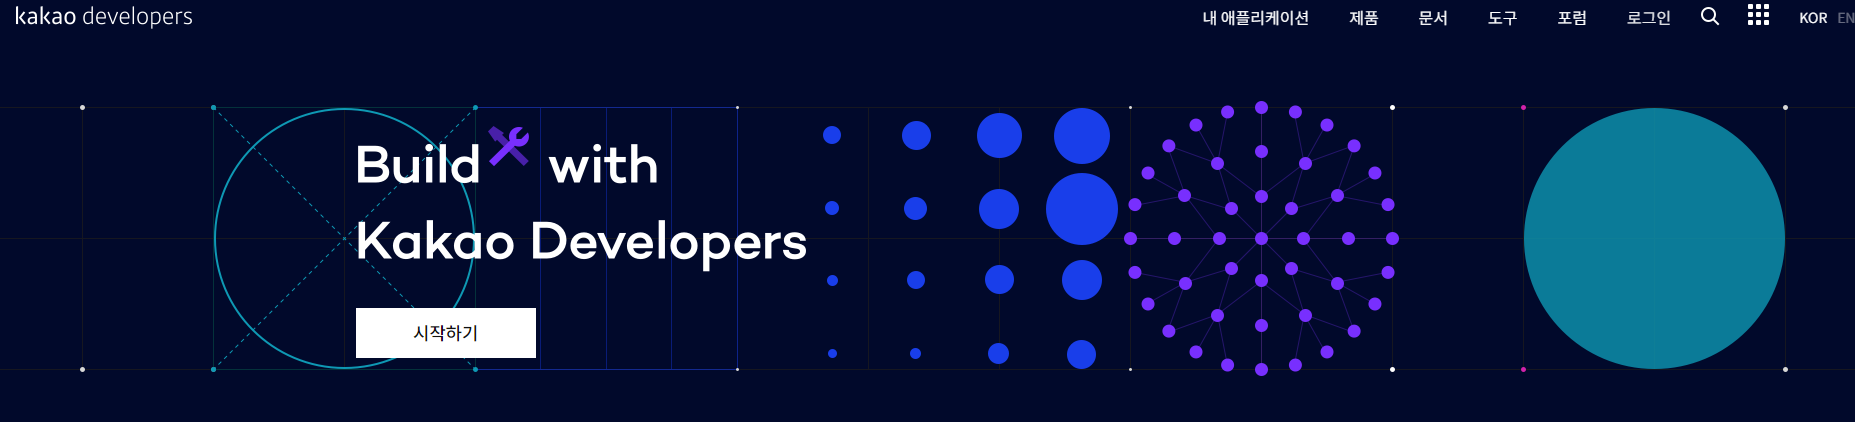
- 시작하기 클릭 후 로그인(카카오계정 사용)
- 애플리케이션 추가
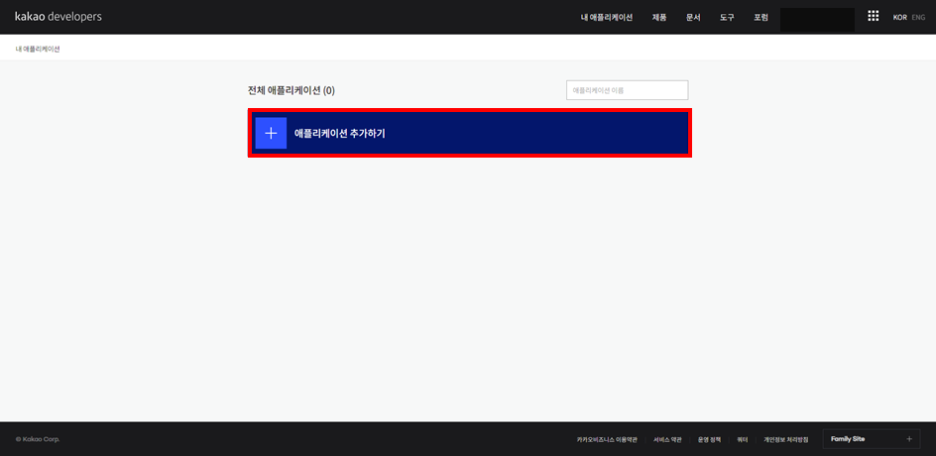
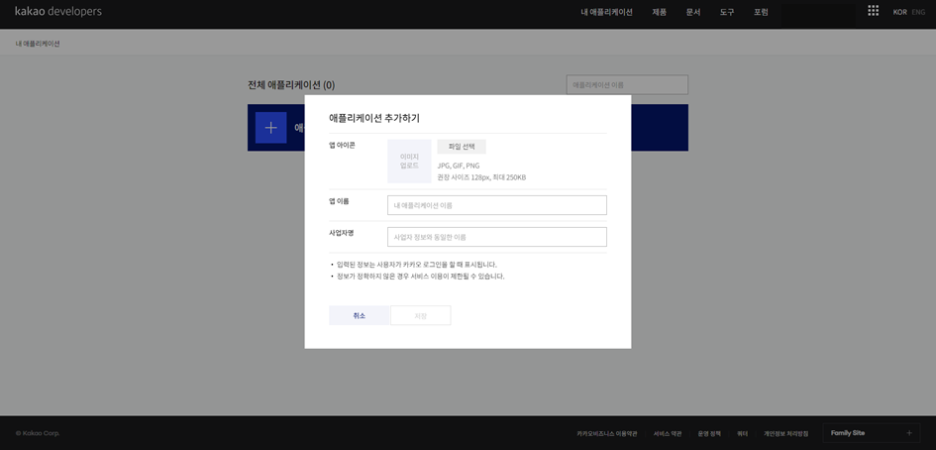
- 내용은 임의로 입력
- 생성된 애플리케이션 선택
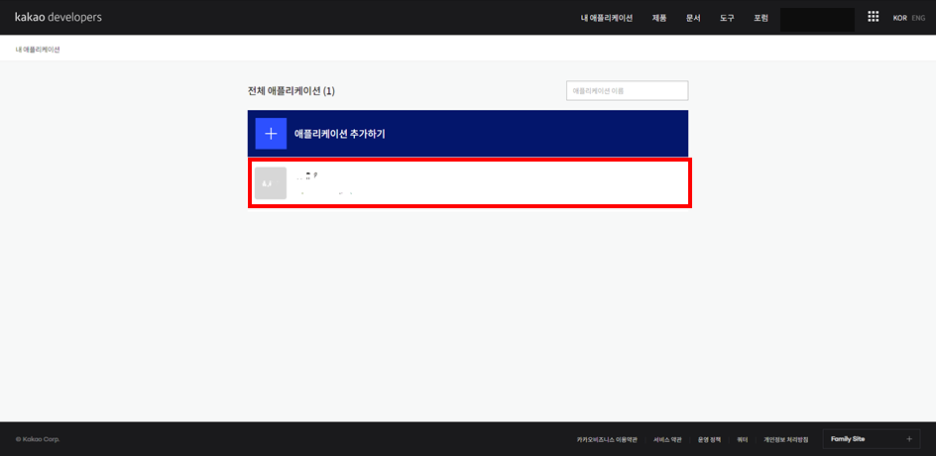
- 플랫폼 플랫폼 설정하기 클릭
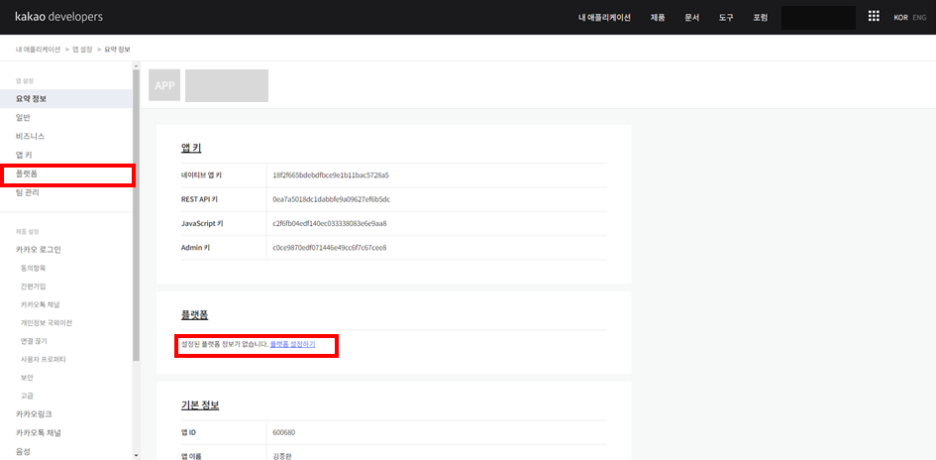
- wdb 플랫폼 등록 클릭
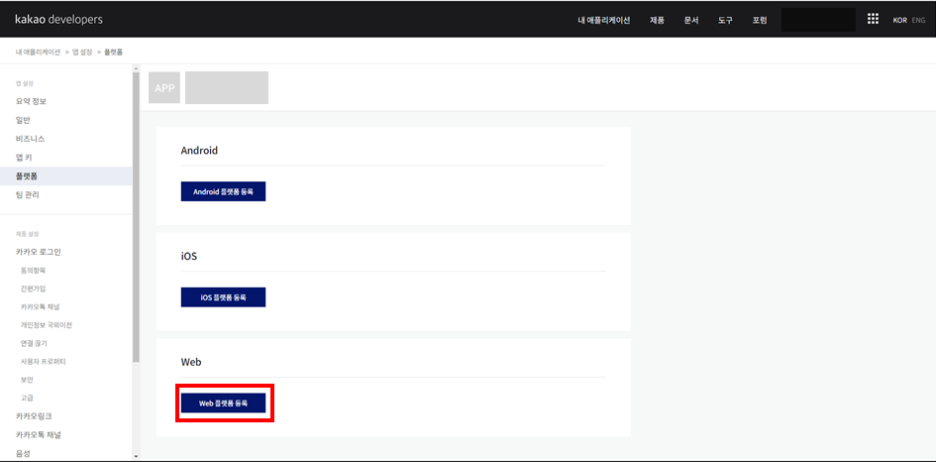
- 사용할 도메인 등록
- 임의의 내용 입력
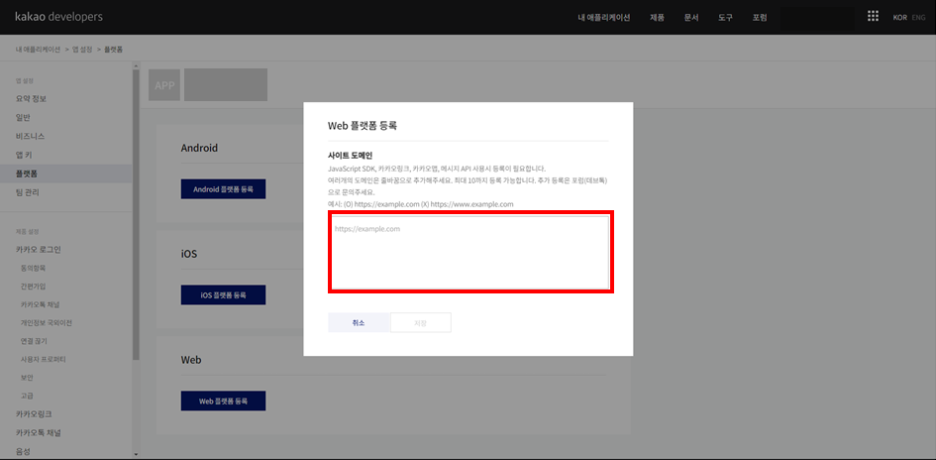
- 상단의 RESTAPI 키를 사용
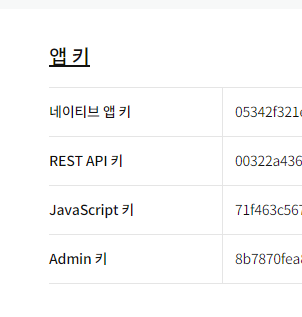

## 예제

In [15]:
import pandas as pd
import requests 
import sys
import json
import datetime 

In [16]:
KAKAO_API_KEY = "18b9e741e7c823f8ba016456591a5d00" #카카오 restapi 키 등록

In [17]:
## 카카오서버에 요청 후 응답받은 데이터를 반환하는 함수
def json_request(url):
    headers = {'Authorization': 'KakaoAK {}'.format(KAKAO_API_KEY)} # format함수: 파라미터를 대상{}안에 넣어라
    res = requests.get(url, headers=headers)
    return res.text

In [18]:
def addr_lat_lon(addr):
    # 주소 -> 좌표 변환 요청 주소
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    # print(url)
    try : 
        res_json = json_request(url)
        res = json.loads(res_json)
        match_adr = res['documents'][0]['address']
    except :
        return 'NaN','NaN'
    
    return float(match_adr['x']), float(match_adr['y'])

In [19]:
addr_lat_lon('서울특별시 중구 세종대로 110')

(126.977829174031, 37.5663174209601)

In [30]:
def reverse_geocode(longitude, latitude):
    # 파라미터 최적화하여 url 생성
    # 좌표 -> 주소 변환 api 요청 주소


    URL = 'https://dapi.kakao.com/v2/local/geo/coord2address.json' 
    # URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'
    url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
    # print(url)
    json_res = json_request(url=url)
    res = json.loads(json_res)
    return res


In [38]:
def reverse_geocode(longitude, latitude):
    # 파라미터 최적화하여 url 생성
    # 좌표 -> 주소 변환 api 요청 주소
    # 위경도에 매칭되는 최종 번지까지 반환해주는 url
    URL = 'https://dapi.kakao.com/v2/local/geo/coord2address.json' 
    # 위경도를 포함하는 행정구역까지 반환
    # URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'
    url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
    # print(url)
    try : 
        json_res = json_request(url=url)
        res = json.loads(json_res)
        doc = res['documents'][0]
        juso1 = doc['road_address']['address_name']
        juso2 = doc['address']['address_name']
    except : 
        return 'juso 검색 실패'
    return juso1, juso2

In [39]:
lat = 37.5663174209601
lng = 126.977829174031

In [40]:
reverse_geocode(lng, lat)#['documents'][0]['road_address']['address_name']

('서울특별시 중구 세종대로 110', '서울 중구 태평로1가 31')

In [41]:
addr_lat_lon('서울특별시 중구 세종대로 110')

(126.977829174031, 37.5663174209601)